In [1]:
import numpy as np
import pandas as pd
from utils import *
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
%matplotlib inline

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [3]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [4]:
df.shape

(5000, 7)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

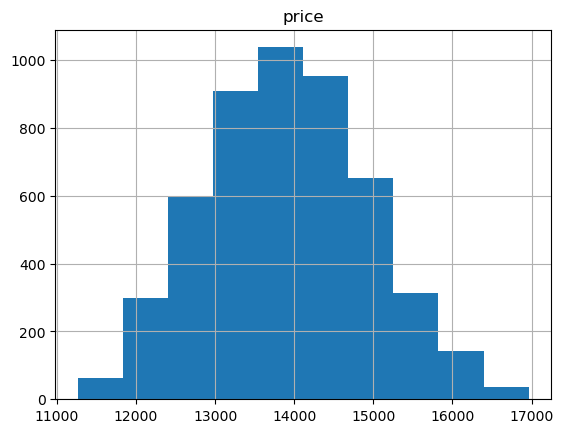

In [5]:
df.hist("price")

## Check Missing Values

In [6]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


### Data Normalization

In [7]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


### Select X  Lables

In [8]:
X = df_norm.iloc[:,:5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


### Select Y Labels

In [9]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Feature and Label Values

In [10]:
X_arr = X.values
Y_arr = Y.values

In [11]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [12]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

### Train and Test Split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_arr,Y_arr,test_size = 0.01,shuffle = True, random_state=1)

print ('X_train shape: ', X_train.shape)
print ('y_train shape: ', y_train.shape)
print ('X_test shape: ', X_test.shape)
print ('y_test shape: ', y_test.shape)



X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


### Create the Model

In [14]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,),activation = 'relu'),
        Dense(20,activation = 'relu'),
        Dense(5,activation = 'relu'),
        Dense(1)
    ])
    
    model.compile(
        loss='mse',
        optimizer = 'adadelta'
    )
    
    return model

In [15]:
model = get_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training

In [16]:
model = get_model()

preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 5s 70ms/step


In [17]:
history = model.fit(
    X_train,y_train,
    validation_data = (X_test,y_test),
    epochs = 1000
    
)

Epoch 1/1000

155/155 [==============================] - 4s 5ms/step - loss: 0.9166 - val_loss: 0.6486
Epoch 2/1000
155/155 [==============================] - 1s 3ms/step - loss: 0.9151 - val_loss: 0.6476
Epoch 3/1000
155/155 [==============================] - 1s 3ms/step - loss: 0.9136 - val_loss: 0.6466
Epoch 4/1000
155/155 [==============================] - 1s 3ms/step - loss: 0.9123 - val_loss: 0.6457
Epoch 5/1000
155/155 [==============================] - 1s 3ms/step - loss: 0.9110 - val_loss: 0.6449
Epoch 6/1000
155/155 [==============================] - 1s 3ms/step - loss: 0.9096 - val_loss: 0.6440
Epoch 7/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9083 - val_loss: 0.6431
Epoch 8/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9070 - val_loss: 0.6422
Epoch 9/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9057 - val_loss: 0.6414
Epoch 10/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.90

### Plot Training and Validation Loss 

In [18]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


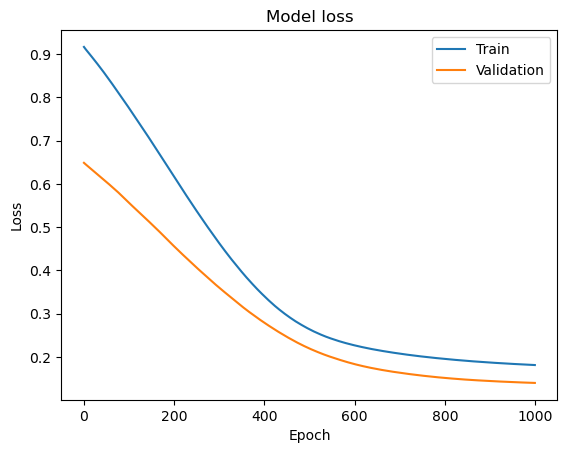

In [19]:
plot_loss(history)

### Predictions

In [20]:
preds_on_trained = model.predict(X_test) 

2/2 [==============================] - 0s 0s/step


In [22]:
def compare_predictions(preds_on_untrained, preds_on_trained, actual_values):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(actual_values, preds_on_untrained, color='blue')
    plt.title('Predictions on Untrained Model')
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')

    plt.subplot(1, 2, 2)
    plt.scatter(actual_values, preds_on_trained, color='red')
    plt.title('Predictions on Trained Model')
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')

    plt.tight_layout()
    plt.show()

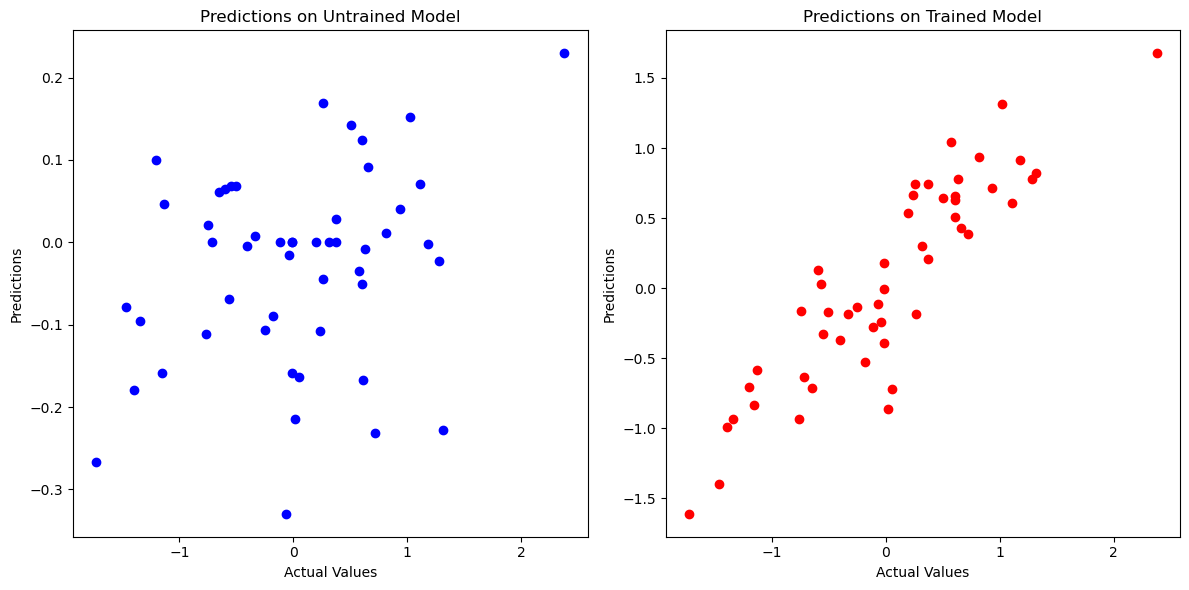

In [23]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

### Convert Label Value

In [29]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(pred):
    return int(pred * y_std + y_mean)

print(convert_label_actual(0.350088))

14263


### Price Predictions

In [30]:
price_on_untrained = [convert_label_actual(y) for y in preds_on_untrained]
price_on_trained = [convert_label_actual(y) for y in preds_on_trained]
price_y_test = [convert_label_actual(y) for y in y_test]


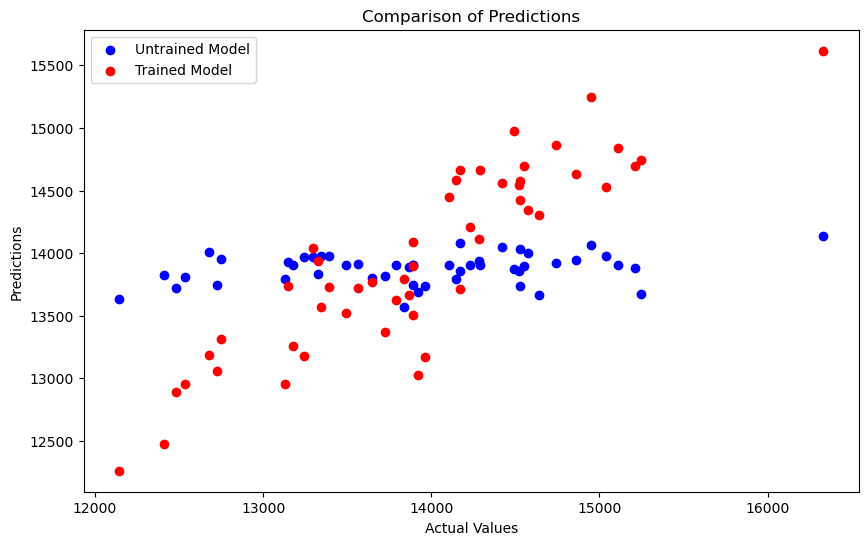

In [31]:
# plot price predictions
compare_predictions(price_on_untrained,price_on_trained,price_y_test)